In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Mall_Customers.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../input/Mall_Customers.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Information
*Given data shows the information about the customers who visited mall and tells how good they were in shopping.The data has 5 coloumns, and each column has 200 entries.*
  
   * **CustomerID:** It specifies about the ID number of a specific customer. 
   * **Genre:** Tells about the gender of a person.
   * **Age:** Gives us the age of a specific person
   * **Annual Income:** Shows the salary of the customer per year.
   * **Spending Score:** This is one of the important column which tells about the score of a customer. This score is given based on the factors like
        * How much money is he/she spending ?
        * How frequently is he visiting the mall ?

In [5]:
x=df.iloc[:,[3,4]].values
y=df.iloc[:,1].values

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37271.8862365895, 30241.34361793659, 25005.9348059662, 21818.114588452183, 19787.670554966855]


Text(0, 0.5, 'wcss value')

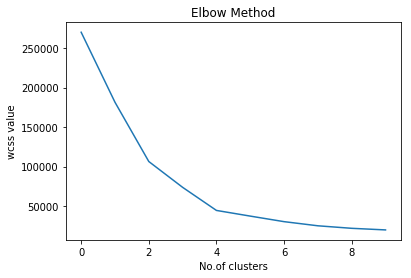

In [6]:
from sklearn.cluster import KMeans
value=[]
for i in range(1,11):
    cluster=KMeans(n_clusters=i)
    cluster.fit(x)
    value.append(cluster.inertia_)
print(value)
plt.plot(value)
plt.title('Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('wcss value')

In [7]:
cluster=KMeans(n_clusters=5)
group=cluster.fit_predict(x)

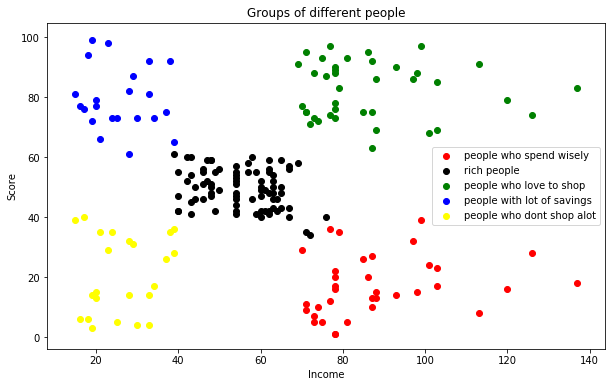

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(x[group==0,0],x[group==0,1],color='red',label='people who spend wisely')
plt.scatter(x[group==1,0],x[group==1,1],color='black',label='rich people')
plt.scatter(x[group==2,0],x[group==2,1],color='green',label='people who love to shop')
plt.scatter(x[group==3,0],x[group==3,1],color='blue',label='people with lot of savings')
plt.scatter(x[group==4,0],x[group==4,1],color='yellow',label='people who dont shop alot')
plt.title('Groups of different people')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
label_x=LabelEncoder()
y=label_x.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print("Decision Tree Classifier accuracy score is ",score)

[[11 11]
 [ 8 10]]
Decision Tree Classifier accuracy score is  0.525


In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
score=accuracy_score(y_test,y_pred)
print("Random Forest Classifier accuracy score is ",score)

[[13  9]
 [12  6]]
Random Forest Classifier accuracy score is  0.475
